# 붓꽃 데이터 분류
## 문제정의

In [1]:
# 패키지 로딩
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로딩
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# 꽃의 품종 target 속성
# 0~2까지 3종류 꽃 존재

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target # 종속변수
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# 데이터프레임 요약 정보
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


- 데이터 총 150개
- 컬럼 5개
- 결측치 없음

In [8]:
# 데이터프레임 통계정보
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# 품종 카테고리 확인
iris_df['label'].unique()

array([0, 1, 2])

- 종속변수가 3개를 가진 범주형 데이터 
- 지도학습의 '분류'

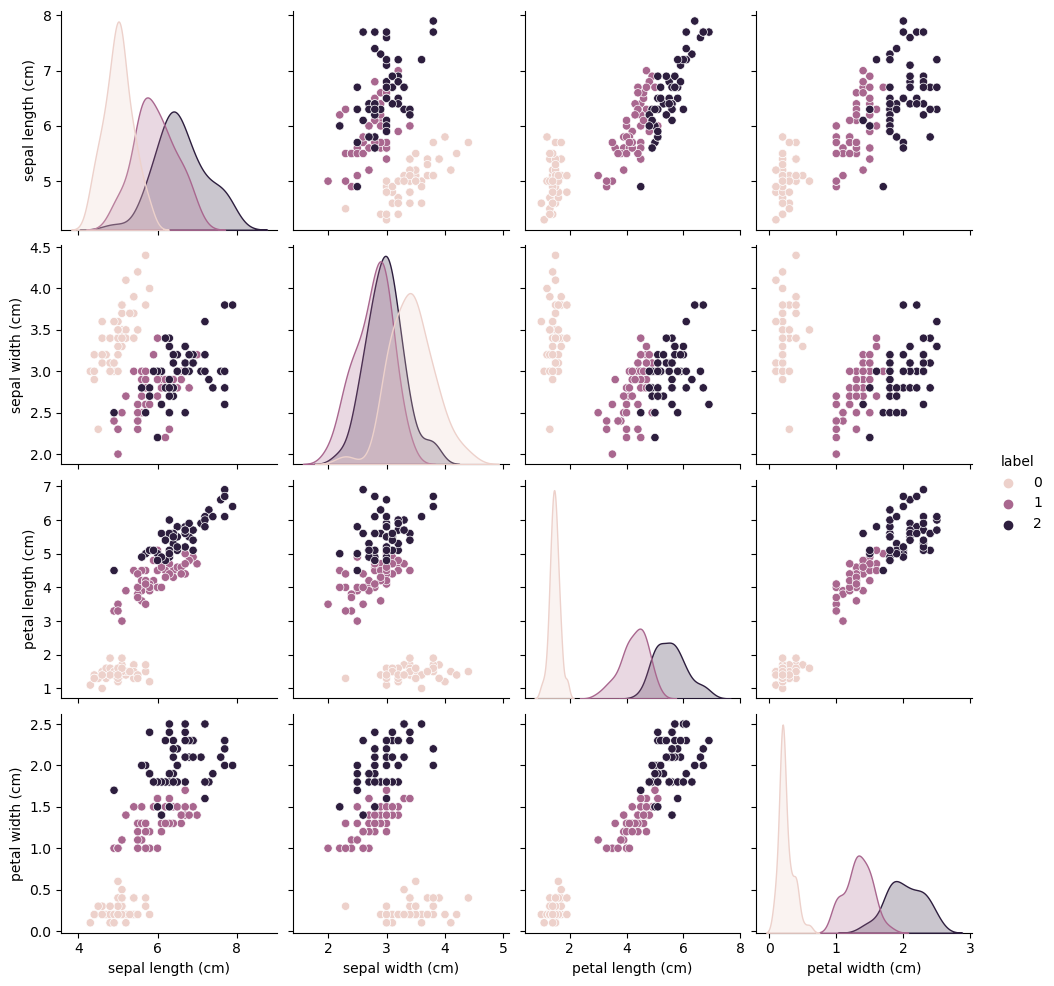

In [10]:
# iris 데이터의 pairplot
sns.pairplot(iris_df,hue = 'label') #hue: 그룹핑할 변수(색상)

- 0 품종 작은 품종
- 2 품종으로 갈수록 크다
- 피처값에 따라 상관관계 보임

## 데이터 정제

In [11]:
# 결측치 확인
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [12]:
# 중복값 여부 확인
iris_df.duplicated().sum()

1

In [13]:
# 중복값 확인
iris_df[iris_df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
142,5.8,2.7,5.1,1.9,2


In [14]:
# 중복값 삭제 
iris_df.drop_duplicates(keep = 'first', inplace= True)
# keep = 'first': 중복값 중 첫 번째 값을 남기고 나머지 제거
# inplace = True: 변경된 설정으로 덮어쓰겠다는 의미
# inplace 기본값: False
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   label              149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [15]:
# 데이터 분할
X = iris_df.iloc[:,:4]
y = iris_df['label']

In [16]:
# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, stratify = y)

# random_state: 데이터 분할 적용하기 위한 랜덤 씨드 설정
# stratify: 계층화 방식으로 데이터를 분할할 경우 참조하라 데이터

In [17]:
print("학습용 데이터 수:{0}, 테스트용 데이터  수: {1}".format(len(X_train), len(X_test)))

학습용 데이터 수:111, 테스트용 데이터  수: 38


## 학습 - 의사결정나무

In [18]:
# DecisionTreeClassifier 객체 생성
model = DecisionTreeClassifier(random_state = 42)

In [19]:
# 학습용 데이터로 학습 수행
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [21]:
#!pip install graphviz
# !pip3 install pydotplus

In [22]:
# 의사결정나무 모델의 dot 파일로 추츌
export_graphviz(model, out_file = 'tree.dot')

In [23]:
from subprocess import call
call(['C:\\Program Files\\Graphviz\\bin\\dot','dot','-Tpng','tree.dot','-o','decision-tree.png','-Gdpi=600'])

1

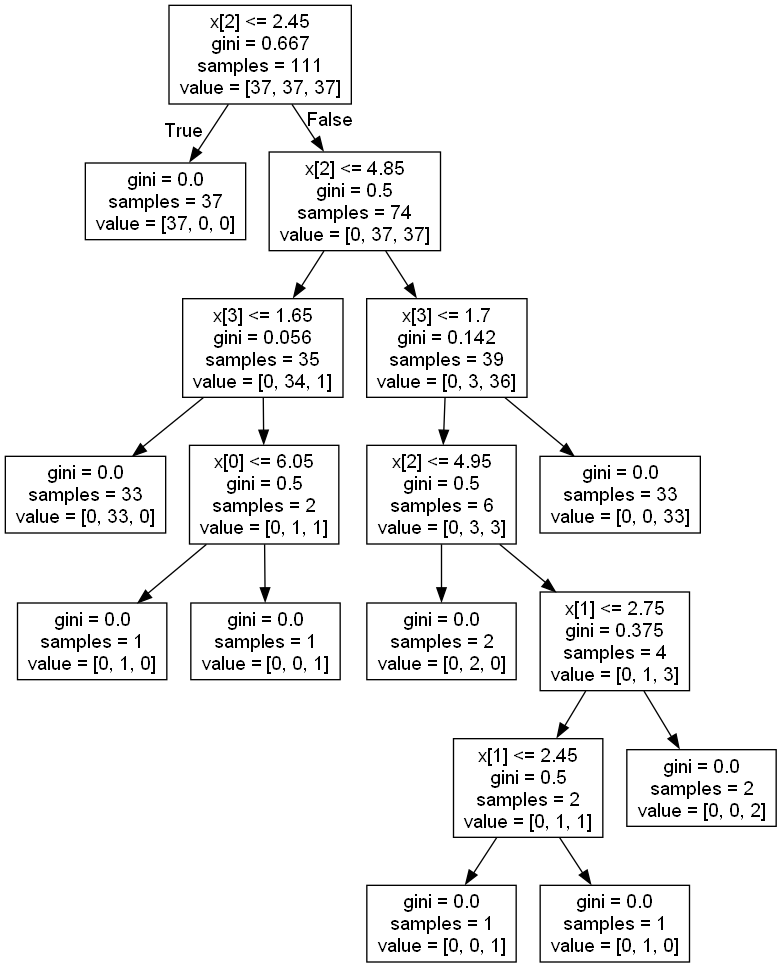

In [24]:
Image(filename = 'tree.png')

## 평가

In [25]:
# 테스트용 데이터로 모델 평가
score = model.score(X_test, y_test)
# 분류기(Classifier)에서 score()는 모델의 정확도(Accuracy) 

print('테스트셋의 정확도: {:,.2f}'.format(score))

테스트셋의 정확도: 0.89


## 예측

In [26]:
new = np.array([[5.4,4,1.5,0.2]])
y_prid = model.predict(new)
print('예측결과:{}'.format(y_prid))

예측결과:[0]
